In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('Documents/bitcoin_2005.csv', parse_dates=['Date'], index_col='Date')

In [3]:
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2022-09-24,18923.498800,19135.629500,18682.763486,18814.051600,4.481175e+10,3.636578e+11
2022-09-23,19290.279614,19294.627882,18831.329282,18931.734112,7.075885e+10,3.654839e+11
2022-09-22,19404.736129,19466.708700,18568.779496,19245.969418,7.798782e+10,3.651541e+11
2022-09-21,18480.425742,19493.936454,18374.854404,19429.132694,9.924069e+10,3.635562e+11
2022-09-20,18873.908300,19670.865914,18200.895538,18501.820494,7.345714e+10,3.640965e+11
...,...,...,...,...,...,...
2010-07-20,0.079200,0.079200,0.079200,0.079200,0.000000e+00,0.000000e+00
2010-07-19,0.074700,0.074700,0.074700,0.074700,0.000000e+00,0.000000e+00
2010-07-18,0.080800,0.080800,0.080800,0.080800,0.000000e+00,0.000000e+00


In [4]:
df1 =df.iloc[::-1]  

In [5]:
df1.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-07-16,0.0500,0.0500,0.0500,0.0500,0.0,0.0
2010-07-17,0.0858,0.0858,0.0858,0.0858,0.0,0.0
2010-07-18,0.0808,0.0808,0.0808,0.0808,0.0,0.0
2010-07-19,0.0747,0.0747,0.0747,0.0747,0.0,0.0
2010-07-20,0.0792,0.0792,0.0792,0.0792,0.0,0.0


In [6]:
df1.drop(['Volume','Market Cap'],axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13556\546301316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Volume','Market Cap'],axis=1,inplace=True)


In [7]:
df1.shape

(4454, 4)

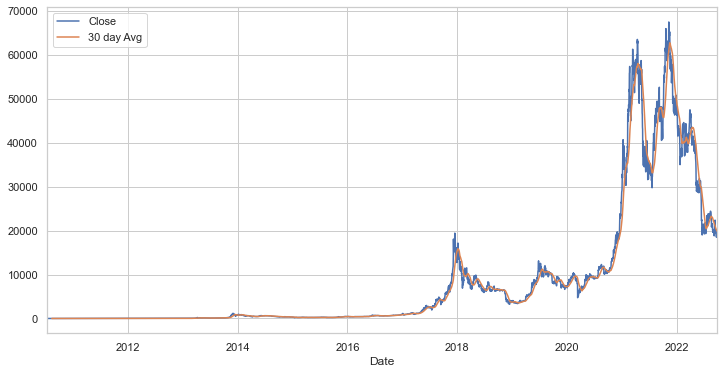

In [8]:
sns.set()
sns.set_style('whitegrid')
df1['Close'].plot(figsize=(12,6),label='Close')
df1['Close'].rolling(window=30).mean().plot(label='30 day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

In [9]:
df1['ohlc_average'] = (df1['Open'] + df1['High'] + df1['Low'] + df1['Close']) / 4

C:\Users\user\AppData\Local\Temp\ipykernel_13556\2647192359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ohlc_average'] = (df1['Open'] + df1['High'] + df1['Low'] + df1['Close']) / 4


In [10]:
df1.head()

,Open,High,Low,Close,ohlc_average
Date,,,,,
2010-07-16,0.0500,0.0500,0.0500,0.0500,0.0500
2010-07-17,0.0858,0.0858,0.0858,0.0858,0.0858
2010-07-18,0.0808,0.0808,0.0808,0.0808,0.0808
2010-07-19,0.0747,0.0747,0.0747,0.0747,0.0747
2010-07-20,0.0792,0.0792,0.0792,0.0792,0.0792


In [11]:
df1['Price_After_Month']=df1['Close'].shift(-30)

In [12]:
df1.tail()

,Open,High,Low,Close,ohlc_average,Price_After_Month
Date,,,,,,
2022-09-20,18873.908300,19670.865914,18200.895538,18501.820494,18811.872562,NaN
2022-09-21,18480.425742,19493.936454,18374.854404,19429.132694,18944.587323,NaN
2022-09-22,19404.736129,19466.708700,18568.779496,19245.969418,19171.548436,NaN
2022-09-23,19290.279614,19294.627882,18831.329282,18931.734112,19086.992722,NaN
2022-09-24,18923.498800,19135.629500,18682.763486,18814.051600,18888.985846,NaN


In [13]:
from sklearn import preprocessing
df1.dropna(inplace=True)
X=df1.drop('Price_After_Month',axis=1)

y=df1['Price_After_Month']

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

 ##                       MODEL SELECTION  

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
reg =GradientBoostingRegressor(n_estimators=300,max_depth=1,learning_rate=0.1,random_state=0)

In [18]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=300, random_state=0)

In [19]:
accuracy=reg.score(X_test,y_test)

In [20]:
accuracy

0.9517660531239683

In [21]:
rpred=reg.predict(X_test)

In [22]:
rpred

array([8436.55980686,  178.76516695,  178.76516695, ..., 9102.90557687,
        621.44814125, 6646.90926529])

In [23]:
print("The prediction is:",rpred[100],"But the real value is:" ,y_test[100])

The prediction is: 39954.29191535351 But the real value is: 31193.0692


In [24]:
reg.predict(sc.transform([[21511.405476,21511.40547,20931.27811,21418.635000,21343.1810106]]))

C:\Users\user\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([23900.67732575])